In [1]:
from typing import Dict, Iterable, Optional
import scanpy as sc
import numpy as np
import torch
from torch.distributions import Normal, Poisson
from torch.distributions import kl_divergence as kld
import scvi
from scvi import REGISTRY_KEYS
from scvi._compat import Literal
from scvi.distributions import NegativeBinomial, ZeroInflatedNegativeBinomial
from scvi.module._peakvae import Decoder as DecoderPeakVI
from scvi.module.base import BaseModuleClass, LossRecorder, auto_move_data
from scvi.nn import DecoderSCVI, Encoder, FCLayers
from scvi.module import MULTIVAE

from anndata import AnnData
from typing import Dict, Iterable, List, Optional, Sequence, Union
from scvi.model import MULTIVI 

Global seed set to 0


In [2]:
from complementary_models import MultiVI_Parallel 

ImportError: cannot import name 'MultiVI_Parallel' from 'complementary_models' (/home/haiyi/Desktop/HierachicalCausal_Omics/complementary_models/__init__.py)

In [5]:
adata_multi = sc.read_h5ad("halo/E18_mouse_Brain/multiomic.h5ad")
adata_multi.obs["batch_id"] = 1
adata_multi.var["modality"] =adata_multi.var["feature_types"]
adata_mvi = scvi.data.organize_multiome_anndatas(adata_multi)

In [6]:
sc.pp.filter_genes(adata_mvi, min_cells=int(adata_mvi.shape[0] * 0.01))
MultiVI_Parallel.setup_anndata(adata_mvi, batch_key="modality")

NameError: name 'MultiVI_Parallel' is not defined

In [7]:
mvi_p = MultiVI_Parallel(
    adata_mvi,
    n_genes=(adata_mvi.var['modality']=='Gene Expression').sum(),
    n_regions=(adata_mvi.var['modality']=='Peaks').sum(),
)
mvi_p.view_anndata_setup()

NameError: name 'MultiVI_Parallel' is not defined

In [12]:
mvi_p.train(use_gpu=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:385: LightningDeprecationWarning: The `Callback.on_epoch_end` hook was deprecated in v1.6 and will be removed in v1.8. Please use `Callback.on_<train/validation/test>_epoch_end` instead.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/500:   0%|          | 0/500 [00:00<?, ?it/s]

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/module/_multivae.py:557: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484775609/work/aten/src/ATen/native/TensorShape.cpp:2985.)
  x = torch.where(mask_expr.T, x_expr.T, x_acc.T).T


Epoch 346/500:  69%|██████▉   | 346/500 [20:54<09:18,  3.62s/it, loss=1.64e+04, v_num=1]
Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 35656.305. Signaling Trainer to stop.


In [13]:
mvi_p.save("trained_multivi_P")

In [18]:
mvi_p.load('trained_multivi_P',adata_mvi)
mvi_p.view_anndata_setup()

INFO     File trained_multivi_P/model.pt already downloaded                                  


Anndata setup with scvi-tools version 0.17.2.

Setup via `MultiVI_Parallel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'modality',
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│          n_vars          │ 138466 │
│         n_cells          │  3365  │
│         n_batch          │   1    │
│ n_extra_categorical_covs │   0    │
│ n_extra_continuous_covs  │   0    │
└──────────────────────────┴────────┘

               Data Registry               
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃   scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │         adata.X          │
│    batch     │ adata.obs['_scvi_batch'] │
└──────────────┴──────────────────────────┘

                    batch State Registry                    
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['modality'] │   paired   │          0          │
└───────────────────────┴────────────┴─────────────────────┘

In [19]:
z,z_atac,z_rna = mvi_p.get_latent_representation()

RuntimeError: Please train the model first.

In [8]:
from numpy.linalg import inv
import pandas as pd
df_meta= pd.read_csv("halo/E18_mouse_Brain/RNA/metadata.tsv",sep = "\t",index_col=0)

In [9]:
df_meta.head()

,n_counts,celltype,velo_s_norm_self_transition,root_cells,end_points,velo_s_norm_pseudotime,latent_time,binned
AAACAGCCAACCGCCA-1,681.0,Upper Layer,0.057197,0.037962,0.086987,0.857504,0.604954,"(0.6, 0.65]"
AAACAGCCAAGGTCGA-1,296.0,"RG, Astro, OPC",0.114116,0.049274,0.396248,0.213945,0.281341,"(0.25, 0.3]"
AAACAGCCAGGAACAT-1,504.0,Deeper Layer,0.082940,0.020133,0.338813,0.958743,0.851495,"(0.85, 0.9]"
AAACAGCCATATTGAC-1,321.0,Deeper Layer,0.106146,0.003566,0.735495,0.981135,0.982605,"(0.95, 1.0]"
AAACAGCCATGGTTAT-1,432.0,Subplate,0.103904,0.036739,0.134693,0.848509,0.549869,"(0.5, 0.55]"


In [21]:
# X = z_atac
# Y = z_rna
b = inv(X.T.dot(X)).dot(X.T).dot(Y)

Yhat = X.dot(b)
Y_Residual = Yhat - Y
Y_Residual = np.sum(np.abs(Y_Residual),axis=1)

NameError: name 'inv' is not defined

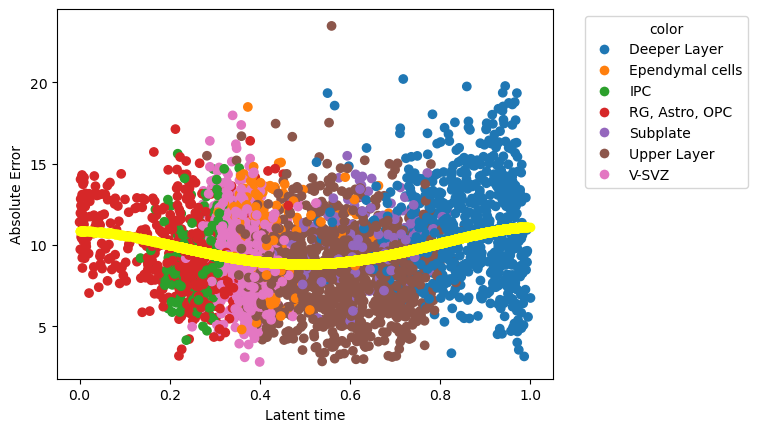

In [18]:
import tkinter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # for legend handle


colors = {'Deeper Layer':'tab:blue', 'Ependymal cells':'tab:orange', 'IPC':'tab:green', 'RG, Astro, OPC':'tab:red', 
          'Subplate':'tab:purple', 'Upper Layer':'tab:brown', 'V-SVZ':'tab:pink'}

%matplotlib inline
plt.scatter(df_meta['latent_time'], Y_Residual, color=df_meta['celltype'].map(colors))


z = np.polyfit(df_meta['latent_time'], Y_Residual, 4)
p = np.poly1d(z)
plt.scatter(df_meta['latent_time'], p(df_meta['latent_time']),color='yellow')



handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
plt.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.title('My title')
plt.xlabel('Latent time')
plt.ylabel('Absolute Error')

plt.show()

In [1]:
# X = z_atac
# Y = z_rna
from typing import Dict, Iterable, Optional
import scanpy as sc
import numpy as np
import torch
from torch.distributions import Normal, Poisson
from torch.distributions import kl_divergence as kld
import scvi
from scvi import REGISTRY_KEYS
from scvi._compat import Literal
from scvi.distributions import NegativeBinomial, ZeroInflatedNegativeBinomial
from scvi.module._peakvae import Decoder as DecoderPeakVI
from scvi.module.base import BaseModuleClass, LossRecorder, auto_move_data
from scvi.nn import DecoderSCVI, Encoder, FCLayers
from scvi.module import MULTIVAE

from anndata import AnnData
from typing import Dict, Iterable, List, Optional, Sequence, Union
from scvi.model import MULTIVI 

X = np.random.rand(3000,19)
Y = np.random.rand(3000,19)
c_indx = np.random.rand(3000,1)

print(X.shape)
print(Y.shape)

Global seed set to 0


(3000, 19)
(3000, 19)


In [116]:
from ScoreUtils import kernel, pdinv

In [59]:
def kernel(X, Y):
    return np.matmul(X, X.T)

from ScoreUtils import pdinv    

In [69]:
width = 0.1
T,d = X.shape
X = np.matmul(X, np.diag(1./np.std(X, axis=0)))
Y = Y/np.std(Y, axis=0)
print(X.shape, Y.shape)
theta = 1/width**2
Lambda = 1
Ml = []
Wt = 1

(3000, 19) (3000, 19)


In [70]:
d = 2 * np.matmul(X, Y.T)
print(d.shape)

(3000, 3000)


In [71]:
theta = 1/width**2
Kxx, _ = kernel(X,X, [theta,1])
Kxx , _ = kernel(X, X, [theta,1])
Kyy, _ = kernel(Y, Y, [theta,1])
Ktt, _ = kernel(c_indx, c_indx, [1/Wt**2,1])

In [18]:
Kxx.shape

(3000, 3000)

In [72]:
invK = pdinv( Kxx*Ktt +  Lambda * np.eye(T))

In [73]:
Kxx3 = Kxx**3; 
prod_invK =  invK * Kyy * invK
###now finding Ml
Ml = 1/T**2 * Ktt*( Kxx3 * prod_invK) * Ktt
###the square distance
D = np.diag(np.diag(Ml)) * np.ones(Ml.shape) + np.ones(Ml.shape) * np.diag(np.diagonal(Ml)) - 2*Ml
# % Gaussian kernel
# sigma2_square = median( D(find(tril(ones(size(D)),-1))) );
# Mg = exp(-D/sigma2_square/2);

In [74]:
D.shape

(3000, 3000)

In [80]:
# % Gaussian kernel
Kxx, _ = kernel(X,X, [theta,1])

DD = D[np.where(np.tril(np.ones(D.shape),-1) != 0)]
print(DD, DD.shape)
print(np.median(DD), np.median(DD).shape)
print(np.median(DD, []))

sigma2_square = np.median(DD,[])[0,0]
sigma2_square
Mg = np.exp(-D/sigma2_square/2)

[[-1.38838352e-10 -1.06004730e-10 -9.06230926e-11 ... -3.32281234e-11
  -2.60299021e-10  2.93072067e-11]] (1, 4498500)
[[-9.63155797e-11 -1.38838352e-10 -2.60299021e-10 ...  4.68699383e-11
   4.32092945e-11  9.27904460e-11]] (1, 4498500)
[[-7.48562773e-11]]


In [48]:
np.eye(T).shape
Ktt = kernel(c_indx, c_indx, [1/Wt**2,1])
Ktt.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [49]:
Ktt, _ = kernel(c_indx, c_indx, [1/Wt**2,1])
invK2 = pdinv(Ktt +  Lambda * np.eye(T))

In [56]:
Ml2 = np.matmul(Ktt, invK2.T)
Ml2 = np.matmul(Ml2, Kxx.T)
Ml2 = np.matmul(Ml2, invK2.T)
Ml2 = np.matmul(Ml2, Ktt.T)

D2 = np.diag(np.diag(Ml2)) * np.ones(Ml2.shape) + np.ones(Ml2.shape) * np.diag(np.diag(Ml2)) - 2*Ml2
# % Gaussian kernel
DD2 = D2[np.where(np.tril(np.ones(D2.shape),-1) != 0)]
sigma2_square2 = np.median(DD2,[])[0,0]

# sigma2_square2 = median( D2(find(tril(ones(size(D2)),-1))) );
Mg2 = np.exp(-D2/sigma2_square2/2)

# %% 
H = np.eye(T)-1/T*np.ones([T,T])
Mg = np.matmul(np.matmul(H, Mg.T), H.T)
Mg2 = np.matmul(np.matmul(H, Mg2.T), H.T)
testStat = 1/T**2*sum(sum(Mg*Mg2))

In [98]:
from sklearn.gaussian_process.kernels import RBF 
from sklearn.metrics.pairwise import rbf_kernel 
a = np.random.rand(4,4)
b = rbf_kernel(a, a)
print(b)
bb = kernel(a, a, [1, 1])
print(bb)

[[1.         0.92770246 0.76358518 0.86599119]
 [0.92770246 1.         0.79140588 0.87024097]
 [0.76358518 0.79140588 1.         0.96108274]
 [0.86599119 0.87024097 0.96108274 1.        ]]
(matrix([[1.        , 0.86063186, 0.58306233, 0.74994074],
        [0.86063186, 1.        , 0.62632327, 0.75731934],
        [0.58306233, 0.62632327, 1.        , 0.92368003],
        [0.74994074, 0.75731934, 0.92368003, 1.        ]]), 1.0)


In [81]:
a = np.full((3,4), 5)
print(a)
a = np.matrix(a)

[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]


In [82]:
print(np.mean(a))

5.0


In [87]:
aa = np.matrix([[1,2,3],[4,5,6], [7,8,9]])
aa = np.array(aa)
print(np.median(aa))

5.0


In [117]:
## test the kernel embedding the gram matrix

def infer_nonsta_dir(X, Y, c_index, width=0.1, IF_GP=False):
    """learn the nonstationary driving force of the causal mechanism
    X: parents; Y; effect
    width: the kernel width for X and Y
    c_indx: surrogate variable to capture the distribution shift; 
    If If_GP = True (TODO), learning the kernel width for P(Y|X). Set it to False can speed up the process!!!
    """
    width = 0.1
    T,d = X.shape
    ## normalization
    X = X - np.matlib.repmat( np.mean(X,0), X.shape[0], 1)
    X = np.matmul(X, np.diag(1./np.std(X, axis=0, ddof=1)))
    ## normalization
    Y = Y - np.matlib.repmat( np.mean(Y,0), Y.shape[0], 1)
    Y = np.matmul(Y, np.diag(1/np.std(Y, axis=0,  ddof=1)))
    theta = 1/width**2
    Lambda = 1
    Wt = 1
    theta = 1/width**2
    Kxx, _ = kernel(X,X, [theta,1])
    Kxx , _ = kernel(X, X, [theta,1])
    Kyy, _ = kernel(Y, Y, [theta,1])
    Ktt, _ = kernel(c_indx, c_indx, [1/Wt**2,1])

    # Kxx = kernel(X,X)
    # Kxx  = kernel(X, X)
    # Kyy = kernel(Y, Y)
    # Ktt = kernel(c_indx, c_indx)    

    invK = pdinv( np.multiply(Kxx,Ktt) +  Lambda * np.eye(T))

    Kxx3 = np.linalg.matrix_power(Kxx,3)
    prod_invK =  np.matmul(np.matmul(invK, Kyy), invK)
    ###now finding Ml
    Ml = np.matmul(np.matmul(1/T**2*Ktt, np.multiply(Kxx3, prod_invK)), Ktt)
    ###the square distance
    D = np.matmul(np.diag(np.diagonal(Ml)),np.ones(Ml.shape)) + np.matmul(np.ones(Ml.shape), np.diag(np.diagonal(Ml))) - 2*Ml

    DD = D[np.where(np.tril(np.ones(D.shape),-1) != 0)]
    sigma2_square = np.median(np.array(DD))
    Mg = np.exp(-D/sigma2_square/2)


    invK2 = pdinv(Ktt +  Lambda * np.eye(T))
    Ml2 = np.matmul(Ktt, invK2)
    Ml2 = np.matmul(Ml2, Kxx)
    Ml2 = np.matmul(Ml2, invK2)
    Ml2 = np.matmul(Ml2, Ktt)
    D2 =np.matmul(np.diag(np.diagonal(Ml2)),np.ones(Ml2.shape)) + np.matmul(np.ones(Ml2.shape), np.diag(np.diagonal(Ml2))) - 2*Ml2
    # % Gaussian kernel
    DD2 = D2[np.where(np.tril(np.ones(D2.shape),-1) != 0)]
    sigma2_square2 = np.median(np.array(DD2))

    # sigma2_square2 = median( D2(find(tril(ones(size(D2)),-1))) );
    Mg2 = np.exp(-D2/sigma2_square2/2)

    # %% 
    H = np.eye(T)-1/T*np.ones([T,T])
    Mg = np.matmul(np.matmul(H, Mg), H)
    Mg2 = np.matmul(np.matmul(H, Mg2), H)
    testStat = 1/T**2*np.sum(np.sum(np.multiply(Mg, Mg2)))


    return testStat, Mg, Mg2
        
    




In [34]:
a =np.array([1,2,3]).T
np.median(a)

2.0

In [102]:
a = np.random.rand(10,6)
b = np.random.rand(10, 6)
c = np.random.randint(low=0,high=4,size=(10,1))
print(a)
print(b)
print(c) 

[[0.01521291 0.23911499 0.7360053  0.86521264 0.33000604 0.25874244]
 [0.74673502 0.76797884 0.26707618 0.28442193 0.49266576 0.1086746 ]
 [0.54706322 0.04348749 0.34719064 0.72316756 0.68071804 0.24999386]
 [0.39405039 0.31693298 0.47980859 0.34979267 0.75567926 0.06566368]
 [0.83817293 0.5033925  0.64827025 0.54596581 0.24990341 0.37910849]
 [0.6358084  0.37328392 0.88866997 0.25555478 0.59501046 0.89601134]
 [0.04318205 0.68324588 0.8492772  0.72881026 0.51921958 0.87702113]
 [0.56280907 0.12205574 0.20846596 0.37561739 0.93420734 0.21231889]
 [0.324801   0.54270078 0.21385559 0.94535927 0.21189099 0.72366488]
 [0.64585419 0.89586163 0.17119297 0.77169189 0.61259422 0.88836476]]
[[0.83661161 0.32701314 0.79447669 0.93221476 0.30311306 0.86417624]
 [0.02378182 0.20561632 0.07679696 0.41228966 0.30396168 0.15790215]
 [0.80998243 0.51831754 0.65772213 0.74200372 0.98194964 0.67886177]
 [0.435085   0.46957461 0.08630447 0.17380545 0.62811097 0.42535201]
 [0.6749442  0.08427936 0.0236815

In [103]:
from scipy.io import savemat

mdic = {"a": a, "b": b, "c": c}
savemat("testdata_HSIC.mat", mdic)

In [2]:
from scipy.io import loadmat
mdic = loadmat("testdata_HSIC.mat") 

In [3]:
X = mdic['a'] 
Y = mdic['b']
c_indx = mdic['c']

In [118]:
cd_non_con_fun(X, Y, c_indx)

(10, 6) (10, 6)


0.07571453629727216

In [4]:
from infer_nonsta_dir import infer_nonsta_dir
infer_nonsta_dir(X, Y, c_indx)

(0.07571453629727216,
 matrix([[ 0.3295905 ,  0.11366515, -0.11061121,  0.11366515, -0.11061121,
           0.11366515, -0.1175299 , -0.11061121, -0.11061121, -0.11061121],
         [ 0.11366515,  0.66034374, -0.37684736,  0.66034374, -0.37684736,
           0.66034374, -0.21045956, -0.37684736, -0.37684736, -0.37684736],
         [-0.11061121, -0.37684736,  0.23612576, -0.37684736,  0.23612576,
          -0.37684736,  0.06052452,  0.23612576,  0.23612576,  0.23612576],
         [ 0.11366515,  0.66034374, -0.37684736,  0.66034374, -0.37684736,
           0.66034374, -0.21045956, -0.37684736, -0.37684736, -0.37684736],
         [-0.11061121, -0.37684736,  0.23612576, -0.37684736,  0.23612576,
          -0.37684736,  0.06052452,  0.23612576,  0.23612576,  0.23612576],
         [ 0.11366515,  0.66034374, -0.37684736,  0.66034374, -0.37684736,
           0.66034374, -0.21045956, -0.37684736, -0.37684736, -0.37684736],
         [-0.1175299 , -0.21045956,  0.06052452, -0.21045956,  0.0605245

In [21]:
X

array([[0.01521291, 0.23911499, 0.7360053 , 0.86521264, 0.33000604,
        0.25874244],
       [0.74673502, 0.76797884, 0.26707618, 0.28442193, 0.49266576,
        0.1086746 ],
       [0.54706322, 0.04348749, 0.34719064, 0.72316756, 0.68071804,
        0.24999386],
       [0.39405039, 0.31693298, 0.47980859, 0.34979267, 0.75567926,
        0.06566368],
       [0.83817293, 0.5033925 , 0.64827025, 0.54596581, 0.24990341,
        0.37910849],
       [0.6358084 , 0.37328392, 0.88866997, 0.25555478, 0.59501046,
        0.89601134],
       [0.04318205, 0.68324588, 0.8492772 , 0.72881026, 0.51921958,
        0.87702113],
       [0.56280907, 0.12205574, 0.20846596, 0.37561739, 0.93420734,
        0.21231889],
       [0.324801  , 0.54270078, 0.21385559, 0.94535927, 0.21189099,
        0.72366488],
       [0.64585419, 0.89586163, 0.17119297, 0.77169189, 0.61259422,
        0.88836476]])

In [22]:
import numpy.matlib
np.mean(X,0)
Xmean = np.matlib.repmat( np.mean(X,0), X.shape[0], 1)
Xmean

array([[0.47536892, 0.44880547, 0.48098126, 0.58455942, 0.53818951,
        0.46595641],
       [0.47536892, 0.44880547, 0.48098126, 0.58455942, 0.53818951,
        0.46595641],
       [0.47536892, 0.44880547, 0.48098126, 0.58455942, 0.53818951,
        0.46595641],
       [0.47536892, 0.44880547, 0.48098126, 0.58455942, 0.53818951,
        0.46595641],
       [0.47536892, 0.44880547, 0.48098126, 0.58455942, 0.53818951,
        0.46595641],
       [0.47536892, 0.44880547, 0.48098126, 0.58455942, 0.53818951,
        0.46595641],
       [0.47536892, 0.44880547, 0.48098126, 0.58455942, 0.53818951,
        0.46595641],
       [0.47536892, 0.44880547, 0.48098126, 0.58455942, 0.53818951,
        0.46595641],
       [0.47536892, 0.44880547, 0.48098126, 0.58455942, 0.53818951,
        0.46595641],
       [0.47536892, 0.44880547, 0.48098126, 0.58455942, 0.53818951,
        0.46595641]])

In [23]:
X = X - Xmean
# X = np.matmul(X, np.diag(1./np.std(X, axis=0)))
X

array([[-0.460156  , -0.20969048,  0.25502404,  0.28065322, -0.20818347,
        -0.20721397],
       [ 0.2713661 ,  0.31917337, -0.21390508, -0.30013749, -0.04552375,
        -0.3572818 ],
       [ 0.0716943 , -0.40531799, -0.13379063,  0.13860814,  0.14252853,
        -0.21596255],
       [-0.08131853, -0.13187249, -0.00117267, -0.23476675,  0.21748975,
        -0.40029273],
       [ 0.36280401,  0.05458702,  0.16728899, -0.03859361, -0.2882861 ,
        -0.08684791],
       [ 0.16043949, -0.07552156,  0.4076887 , -0.32900464,  0.05682095,
         0.43005493],
       [-0.43218687,  0.2344404 ,  0.36829593,  0.14425084, -0.01896993,
         0.41106472],
       [ 0.08744015, -0.32674973, -0.2725153 , -0.20894203,  0.39601783,
        -0.25363752],
       [-0.15056792,  0.09389531, -0.26712568,  0.36079985, -0.32629852,
         0.25770847],
       [ 0.17048527,  0.44705616, -0.30978829,  0.18713247,  0.0744047 ,
         0.42240835]])

In [28]:
np.std(X, axis=0, ddof=1)

array([0.27902024, 0.28019859, 0.27891078, 0.25442093, 0.22817225,
       0.34125593])

In [29]:
np.diag(1./np.std(X, axis=0, ddof=1))

array([[3.58396938, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 3.56889737, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 3.58537588, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 3.93049428, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 4.3826538 ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        2.93035202]])

In [31]:
X = np.matmul(X, np.diag(1./np.std(X, axis=0, ddof=1)))
X

array([[-1.64918503, -0.74836382,  0.91435704,  1.10310586, -0.91239607,
        -0.60720987],
       [ 0.97256779,  1.13909698, -0.76693012, -1.17968869, -0.19951484,
        -1.04696146],
       [ 0.25695019, -1.44653829, -0.47968969,  0.54479851,  0.62465319,
        -0.63284628],
       [-0.29144312, -0.47063939, -0.00420448, -0.92274935,  0.95318227,
        -1.1729986 ],
       [ 1.30027846,  0.19481548,  0.5997939 , -0.15169197, -1.26345817,
        -0.25449496],
       [ 0.5750102 , -0.26952869,  1.46171723, -1.29315086,  0.24902656,
         1.26021233],
       [-1.5489445 ,  0.83669374,  1.32047935,  0.56697709, -0.08313863,
         1.20456435],
       [ 0.31338282, -1.16613626, -0.9770698 , -0.82124546,  1.73560906,
        -0.74324722],
       [-0.5396308 ,  0.33510271, -0.95774596,  1.41812174, -1.43005344,
         0.75517655],
       [ 0.61101398,  1.59549754, -1.11070748,  0.73552312,  0.32609006,
         1.23780516]])

In [32]:
Y = Y - np.matlib.repmat( np.mean(Y,0), Y.shape[0], 1)
Y

array([[ 0.34710025, -0.12262415,  0.31039291,  0.49149608, -0.17387451,
         0.24146428],
       [-0.46572954, -0.24402097, -0.40728682, -0.02842901, -0.17302589,
        -0.46480981],
       [ 0.32047107,  0.06868025,  0.17363835,  0.30128504,  0.50496207,
         0.05614981],
       [-0.05442636,  0.01993732, -0.3977793 , -0.26691323,  0.1511234 ,
        -0.19735995],
       [ 0.18543284, -0.36535793, -0.46040221, -0.26566483,  0.3251163 ,
         0.07355011],
       [ 0.04164516, -0.40977764, -0.05840985,  0.11879106,  0.36917404,
        -0.04041251],
       [-0.22746237,  0.32820167,  0.45434078, -0.38283772, -0.16937774,
         0.10279187],
       [-0.14694297,  0.20004604, -0.27313626, -0.06639847, -0.07818748,
        -0.06139206],
       [ 0.34850755,  0.36911113,  0.43896482,  0.19907376, -0.46944626,
         0.15884559],
       [-0.34859563,  0.15580429,  0.21967758, -0.10040269, -0.28646392,
         0.13117267]])

In [33]:
Y = np.matmul(Y, np.diag(1/np.std(Y, axis=0,  ddof=1)))
Y

array([[ 1.16751695, -0.44307377,  0.85434125,  1.77537683, -0.54465103,
         1.17469839],
       [-1.56654204, -0.88171284, -1.12103697, -0.10269097, -0.54199277,
        -2.26125099],
       [ 1.07794624,  0.24816006,  0.47793104,  1.08829856,  1.58176209,
         0.27316291],
       [-0.18307017,  0.07203884, -1.09486801, -0.96414106,  0.4733846 ,
        -0.96013547],
       [ 0.62372753, -1.32013565, -1.26723448, -0.9596316 ,  1.01840647,
         0.35781359],
       [ 0.14007893, -1.48063589, -0.16077025,  0.42909578,  1.15641458,
        -0.1966026 ],
       [-0.76509933,  1.18588016,  1.2505507 , -1.38288227, -0.53056518,
         0.50007167],
       [-0.49426185,  0.72281969, -0.75179414, -0.23984384, -0.2449174 ,
        -0.29866595],
       [ 1.17225059,  1.33369695,  1.20822911,  0.71909209, -1.47051105,
         0.77276715],
       [-1.17254684,  0.56296245,  0.60465176, -0.36267351, -0.89733031,
         0.6381413 ]])

In [36]:
width=0.1
theta = 1/width**2; 
Lambda = 2

In [37]:
def kernel(X, Y):
    return np.matmul(X, X.T)

from ScoreUtils import pdinv    

In [38]:
Kyy = kernel(Y, Y)

In [39]:
Kyy

array([[ 7.11783309, -4.93945482,  2.94839921, -4.27845965, -1.60758155,
         0.58323833, -1.92903266, -2.18287136,  4.79527939, -0.50734996],
       [-4.93945482,  9.90575301, -4.02998435,  3.4642019 ,  0.3449721 ,
         1.04002076, -1.95017461,  1.81248352, -5.39104544, -0.25677208],
       [ 2.94839921, -4.02998435,  5.21295264, -1.26549895,  0.40334156,
         1.94917828, -2.1403865 , -1.44272569,  0.83972319, -2.4749994 ],
       [-4.27845965,  3.4642019 , -1.26549895,  3.31296133,  2.2419362 ,
         0.36619977, -0.54169602,  1.36773399, -3.57276219, -1.09461638],
       [-1.60758155,  0.3449721 ,  0.40334156,  2.2419362 ,  5.8237525 ,
         2.94132404, -2.6618182 , -0.43593577, -4.47174038, -2.5782505 ],
       [ 0.58323833,  1.04002076,  1.94917828,  0.36619977,  2.94132404,
         3.79782225, -3.36934   , -1.34602583, -3.54864832, -2.41376928],
       [-1.92903266, -1.95017461, -2.1403865 , -0.54169602, -2.6618182 ,
        -3.36934   ,  5.99950026,  0.6074463 

In [44]:
T,d = X.shape
Kxx = kernel(X, X)
Kyy = kernel(Y, Y)
Ktt = kernel(c_indx, c_indx)
invK = pdinv( Kxx*Ktt +  Lambda * np.eye(T))

In [47]:
invK

matrix([[ 0.33936131,  0.        , -0.06868456,  0.        ,  0.03853884,
          0.        , -0.03710927,  0.06274611, -0.0651831 ,  0.1172221 ],
        [ 0.        ,  0.5       ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.06868456,  0.        ,  0.16436291,  0.        ,  0.00767954,
          0.        ,  0.02812351, -0.07529331, -0.03257386,  0.01762098],
        [ 0.        ,  0.        ,  0.        ,  0.5       ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.03853884,  0.        ,  0.00767954,  0.        ,  0.18938252,
          0.        ,  0.07994403,  0.16438748,  0.04303152,  0.02833678],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.5       ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.03710927,  0.        ,  0.02812351,  0.        ,  0.07994403,
          0.        ,  0.0698666

In [69]:
pdinv( np.multiply(Kxx,Ktt) +  Lambda * np.eye(T))

matrix([[ 0.33936131,  0.        , -0.06868456,  0.        ,  0.03853884,
          0.        , -0.03710927,  0.06274611, -0.0651831 ,  0.1172221 ],
        [ 0.        ,  0.5       ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.06868456,  0.        ,  0.16436291,  0.        ,  0.00767954,
          0.        ,  0.02812351, -0.07529331, -0.03257386,  0.01762098],
        [ 0.        ,  0.        ,  0.        ,  0.5       ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.03853884,  0.        ,  0.00767954,  0.        ,  0.18938252,
          0.        ,  0.07994403,  0.16438748,  0.04303152,  0.02833678],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.5       ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.03710927,  0.        ,  0.02812351,  0.        ,  0.07994403,
          0.        ,  0.0698666

In [64]:
Kxx3 = np.linalg.matrix_power(Kxx,3)
Kxx3

array([[ 1433.29287493, -1100.77166265,  -170.82336971,  -551.14582141,
         -151.70772668,  -230.65513379,  1217.33148543, -1079.69144808,
          905.77427085,  -271.6034689 ],
       [-1100.77166265,   977.86859717,   211.34594219,   522.03271915,
          171.21803234,    64.973221  , -1132.58389609,   931.42450771,
         -747.28392435,   101.77646353],
       [ -170.82336971,   211.34594219,   620.11739105,   685.56478737,
         -224.04703177,  -160.37060983,  -787.20582045,  1025.40403801,
         -648.93697183,  -551.04835504],
       [ -551.14582141,   522.03271915,   685.56478737,  1015.74260341,
         -189.52366143,    96.87956713, -1123.15470208,  1452.93082621,
        -1184.12436874,  -725.20194961],
       [ -151.70772668,   171.21803234,  -224.04703177,  -189.52366143,
          247.26902851,   108.08779019,    27.82319795,  -282.94812016,
          105.82461112,   188.00387992],
       [ -230.65513379,    64.973221  ,  -160.37060983,    96.87956713,
   

In [65]:
prod_invK

matrix([[ 4.88579491e-01, -4.39382899e-01, -7.89114351e-02,
         -5.34064702e-01, -6.19385402e-02,  8.31729587e-02,
         -1.24911461e-01, -4.02307979e-02, -9.42541771e-02,
          1.53945374e-01],
        [-4.39382899e-01,  2.47643825e+00, -1.70348744e-01,
          8.66050474e-01, -1.26596900e-01,  2.60005191e-01,
         -2.71514570e-02, -7.21252841e-02, -2.07662425e-03,
         -1.78654294e-01],
        [-7.89114351e-02, -1.70348744e-01,  1.25107800e-01,
          4.09774544e-02, -5.78597246e-03,  1.91275220e-01,
          1.07007553e-02, -9.49748781e-02, -4.34777367e-02,
         -5.19318814e-03],
        [-5.34064702e-01,  8.66050474e-01,  4.09774544e-02,
          8.28240333e-01,  1.23375950e-01,  9.15499430e-02,
          1.35689738e-01,  8.10564820e-02,  9.52744574e-02,
         -1.81467051e-01],
        [-6.19385402e-02, -1.26596900e-01, -5.78597246e-03,
          1.23375950e-01,  1.07338352e-01, -5.86245552e-02,
          6.32891855e-02,  1.07630120e-01,  4.553305

In [67]:
np.multiply(Kxx3 , prod_invK)

matrix([[ 7.00277504e+02,  4.83660245e+02,  1.34799172e+01,
          2.94347529e+02,  9.39655513e+00, -1.91842699e+01,
         -1.52058655e+02,  4.34368485e+01, -8.53730085e+01,
         -4.18120976e+01],
        [ 4.83660245e+02,  2.42163120e+03, -3.60025157e+01,
          4.52106684e+02, -2.16756720e+01,  1.68933747e+01,
          3.07513029e+01, -6.71792572e+01,  1.55182792e+00,
         -1.81828023e+01],
        [ 1.34799172e+01, -3.60025157e+01,  7.75815228e+01,
          2.80926998e+01,  1.29632995e+00, -3.06749237e+01,
         -8.42369683e+00, -9.73876235e+01,  2.82143108e+01,
          2.86169778e+00],
        [ 2.94347529e+02,  4.52106684e+02,  2.80926998e+01,
          8.41278992e+02, -2.33826618e+01,  8.86931885e+00,
         -1.52400568e+02,  1.17769461e+02, -1.12816807e+02,
          1.31600259e+02],
        [ 9.39655513e+00, -2.16756720e+01,  1.29632995e+00,
         -2.33826618e+01,  2.65414500e+01, -6.33659862e+00,
          1.76090754e+00, -3.04537402e+01,  4.818518

In [68]:
Ml = np.matmul(np.matmul(1/T**2*Ktt, np.multiply(Kxx3, prod_invK)), Ktt)
Ml

matrix([[ 1.38050522,  0.        ,  2.76101045,  0.        ,  2.76101045,
          0.        ,  4.14151567,  2.76101045,  2.76101045,  2.76101045],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 2.76101045,  0.        ,  5.52202089,  0.        ,  5.52202089,
          0.        ,  8.28303134,  5.52202089,  5.52202089,  5.52202089],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 2.76101045,  0.        ,  5.52202089,  0.        ,  5.52202089,
          0.        ,  8.28303134,  5.52202089,  5.52202089,  5.52202089],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 4.14151567,  0.        ,  8.28303134,  0.        ,  8.28303134,
          0.        , 12.4245470

In [76]:
D = np.matmul(np.diag(np.diagonal(Ml)),np.ones(Ml.shape)) + np.matmul(np.ones(Ml.shape), np.diag(np.diagonal(Ml))) - 2*Ml
D

matrix([[ 0.        ,  1.38050522,  1.38050522,  1.38050522,  1.38050522,
          1.38050522,  5.52202089,  1.38050522,  1.38050522,  1.38050522],
        [ 1.38050522,  0.        ,  5.52202089,  0.        ,  5.52202089,
          0.        , 12.42454701,  5.52202089,  5.52202089,  5.52202089],
        [ 1.38050522,  5.52202089,  0.        ,  5.52202089,  0.        ,
          5.52202089,  1.38050522,  0.        ,  0.        ,  0.        ],
        [ 1.38050522,  0.        ,  5.52202089,  0.        ,  5.52202089,
          0.        , 12.42454701,  5.52202089,  5.52202089,  5.52202089],
        [ 1.38050522,  5.52202089,  0.        ,  5.52202089,  0.        ,
          5.52202089,  1.38050522,  0.        ,  0.        ,  0.        ],
        [ 1.38050522,  0.        ,  5.52202089,  0.        ,  5.52202089,
          0.        , 12.42454701,  5.52202089,  5.52202089,  5.52202089],
        [ 5.52202089, 12.42454701,  1.38050522, 12.42454701,  1.38050522,
         12.42454701,  0.       

In [74]:
 np.diag(np.diagonal(Ml))

array([[ 1.38050522,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  5.52202089,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  5.52202089,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 12.42454701,  0.        

In [79]:
invK2 = pdinv(Ktt +  Lambda * np.eye(T))
invK2

matrix([[ 0.484375,  0.      , -0.03125 ,  0.      , -0.03125 ,
          0.      , -0.046875, -0.03125 , -0.03125 , -0.03125 ],
        [ 0.      ,  0.5     ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ],
        [-0.03125 ,  0.      ,  0.4375  ,  0.      , -0.0625  ,
          0.      , -0.09375 , -0.0625  , -0.0625  , -0.0625  ],
        [ 0.      ,  0.      ,  0.      ,  0.5     ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ],
        [-0.03125 ,  0.      , -0.0625  ,  0.      ,  0.4375  ,
          0.      , -0.09375 , -0.0625  , -0.0625  , -0.0625  ],
        [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.5     ,  0.      ,  0.      ,  0.      ,  0.      ],
        [-0.046875,  0.      , -0.09375 ,  0.      , -0.09375 ,
          0.      ,  0.359375, -0.09375 , -0.09375 , -0.09375 ],
        [-0.03125 ,  0.      , -0.0625  ,  0.      , -0.0625  ,
          0.      , -0.09375 ,  0

In [80]:
Ml2 = np.matmul(Ktt, invK2)
Ml2 = np.matmul(Ml2, Kxx)
Ml2 = np.matmul(Ml2, invK2)
Ml2 = np.matmul(Ml2, Ktt)
Ml2

matrix([[0.06037068, 0.        , 0.12074135, 0.        , 0.12074135,
         0.        , 0.18111203, 0.12074135, 0.12074135, 0.12074135],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.12074135, 0.        , 0.2414827 , 0.        , 0.2414827 ,
         0.        , 0.36222405, 0.2414827 , 0.2414827 , 0.2414827 ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.12074135, 0.        , 0.2414827 , 0.        , 0.2414827 ,
         0.        , 0.36222405, 0.2414827 , 0.2414827 , 0.2414827 ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.18111203, 0.        , 0.36222405, 0.        , 0.36222405,
         0.        , 0.54333608, 0.36222405, 0.36222405, 0.36222405],
        [0.12074135, 0.    

In [81]:
DD = D[np.where(np.tril(np.ones(D.shape),-1) != 0)]
DD

matrix([[ 1.38050522,  1.38050522,  5.52202089,  1.38050522,  0.        ,
          5.52202089,  1.38050522,  5.52202089,  0.        ,  5.52202089,
          1.38050522,  0.        ,  5.52202089,  0.        ,  5.52202089,
          5.52202089, 12.42454701,  1.38050522, 12.42454701,  1.38050522,
         12.42454701,  1.38050522,  5.52202089,  0.        ,  5.52202089,
          0.        ,  5.52202089,  1.38050522,  1.38050522,  5.52202089,
          0.        ,  5.52202089,  0.        ,  5.52202089,  1.38050522,
          0.        ,  1.38050522,  5.52202089,  0.        ,  5.52202089,
          0.        ,  5.52202089,  1.38050522,  0.        ,  0.        ]])

In [85]:
Mg = np.exp(-D/sigma2_square/2)
Mg

matrix([[1.        , 0.60653066, 0.60653066, 0.60653066, 0.60653066,
         0.60653066, 0.13533528, 0.60653066, 0.60653066, 0.60653066],
        [0.60653066, 1.        , 0.13533528, 1.        , 0.13533528,
         1.        , 0.011109  , 0.13533528, 0.13533528, 0.13533528],
        [0.60653066, 0.13533528, 1.        , 0.13533528, 1.        ,
         0.13533528, 0.60653066, 1.        , 1.        , 1.        ],
        [0.60653066, 1.        , 0.13533528, 1.        , 0.13533528,
         1.        , 0.011109  , 0.13533528, 0.13533528, 0.13533528],
        [0.60653066, 0.13533528, 1.        , 0.13533528, 1.        ,
         0.13533528, 0.60653066, 1.        , 1.        , 1.        ],
        [0.60653066, 1.        , 0.13533528, 1.        , 0.13533528,
         1.        , 0.011109  , 0.13533528, 0.13533528, 0.13533528],
        [0.13533528, 0.011109  , 0.60653066, 0.011109  , 0.60653066,
         0.011109  , 1.        , 0.60653066, 0.60653066, 0.60653066],
        [0.60653066, 0.1353

In [87]:
D2 =np.matmul(np.diag(np.diagonal(Ml2)),np.ones(Ml2.shape)) + np.matmul(np.ones(Ml2.shape), np.diag(np.diagonal(Ml2))) - 2*Ml2
DD2 = D2[np.where(np.tril(np.ones(D2.shape),-1) != 0)]
sigma2_square2 = np.median(np.array(DD2))
sigma2_square2

0.060370675721646505

In [88]:
Mg2 = np.exp(-D2/sigma2_square2/2)
Mg2

matrix([[1.        , 0.60653066, 0.60653066, 0.60653066, 0.60653066,
         0.60653066, 0.13533528, 0.60653066, 0.60653066, 0.60653066],
        [0.60653066, 1.        , 0.13533528, 1.        , 0.13533528,
         1.        , 0.011109  , 0.13533528, 0.13533528, 0.13533528],
        [0.60653066, 0.13533528, 1.        , 0.13533528, 1.        ,
         0.13533528, 0.60653066, 1.        , 1.        , 1.        ],
        [0.60653066, 1.        , 0.13533528, 1.        , 0.13533528,
         1.        , 0.011109  , 0.13533528, 0.13533528, 0.13533528],
        [0.60653066, 0.13533528, 1.        , 0.13533528, 1.        ,
         0.13533528, 0.60653066, 1.        , 1.        , 1.        ],
        [0.60653066, 1.        , 0.13533528, 1.        , 0.13533528,
         1.        , 0.011109  , 0.13533528, 0.13533528, 0.13533528],
        [0.13533528, 0.011109  , 0.60653066, 0.011109  , 0.60653066,
         0.011109  , 1.        , 0.60653066, 0.60653066, 0.60653066],
        [0.60653066, 0.1353

In [89]:
H = np.eye(T)-1/T*np.ones([T,T])
H

array([[ 0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9]])

In [90]:
Mg = np.matmul(np.matmul(H, Mg), H)
Mg2 = np.matmul(np.matmul(H, Mg2), H)

In [98]:
Mg2 = np.exp(-D2/sigma2_square2/2)
Mg2 = np.matmul(np.matmul(H, Mg2), H)

In [99]:
Mg2

matrix([[ 0.36415569,  0.1400128 , -0.09246231,  0.1400128 , -0.09246231,
          0.1400128 , -0.32188253, -0.09246231, -0.09246231, -0.09246231],
        [ 0.1400128 ,  0.70280859, -0.39433124,  0.70280859, -0.39433124,
          0.70280859, -0.27678237, -0.39433124, -0.39433124, -0.39433124],
        [-0.09246231, -0.39433124,  0.23785837, -0.39433124,  0.23785837,
         -0.39433124,  0.08616419,  0.23785837,  0.23785837,  0.23785837],
        [ 0.1400128 ,  0.70280859, -0.39433124,  0.70280859, -0.39433124,
          0.70280859, -0.27678237, -0.39433124, -0.39433124, -0.39433124],
        [-0.09246231, -0.39433124,  0.23785837, -0.39433124,  0.23785837,
         -0.39433124,  0.08616419,  0.23785837,  0.23785837,  0.23785837],
        [ 0.1400128 ,  0.70280859, -0.39433124,  0.70280859, -0.39433124,
          0.70280859, -0.27678237, -0.39433124, -0.39433124, -0.39433124],
        [-0.32188253, -0.27678237,  0.08616419, -0.27678237,  0.08616419,
         -0.27678237,  0.7214086

In [97]:
H

array([[ 0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9]])

In [104]:
1/T**2*np.sum(np.sum(np.multiply(Mg, Mg2)))

0.12122052476301054

In [103]:
np.sum(np.sum(np.multiply(Mg, Mg2)))

12.122052476301054